# Applying Advanced Transformations (Core)

I. Clean the files and combine them into one final DataFrame.

- This dataframe should have the following columns:
    - Hero (Just the name of the Hero)
    - Publisher
    - Gender
    - Eye color
    - Race
    - Hair color
    - Height (numeric)
    - Skin color
    - Alignment
    - Weight (numeric)
    - Plus, one-hot-encoded columns for every power that appears in the dataset. E.g.:
    - Agility
    - Flight
    - Superspeed
    - etc.
    
Hint: There is a space in "100 kg" or "52.5 cm"

In [1]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os, json

In [2]:
hero_df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS1ZstYLwFgwhZnqDsPjtnlHYhJp_cmW55J8JD5mym0seRsaem3px7QBtuFF0LiI7z1PLCkVKAkdO7J/pub?output=csv')
hero_df.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [3]:
powers_df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSzdWOBaXOoz52vPmCFV5idNlDBohLY1Lsbc1IfZIZQ7cV_aNB2wYBfhF49uE1TaO1B5MQCGWiNrFfd/pub?output=csv')
powers_df.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


## Clean Data

### Split Hero|Publisher

In [4]:
#Split Hero|Publisher
hero_df['Hero|Publisher'].str.split('|', expand=True)
hero_df.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [5]:
## save the 2 new columns into the dataframe
hero_df[['Hero','Publisher']] = hero_df['Hero|Publisher'].str.split('|',expand=True)
hero_df.head(2)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


In [6]:
hero_df = hero_df.drop(columns = 'Hero|Publisher')
hero_df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


### Split Measurements

In [7]:
## slice out a single test measurement
test_measurement = hero_df.loc[1, 'Measurements']
test_measurement

"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"

In [8]:
## replace ' with " (entire column)
hero_df['Measurements'] = hero_df['Measurements'].str.replace("'", '"')
## apply json.loads
hero_df['Measurements'] = hero_df['Measurements'].apply(json.loads)

In [9]:
## use .apply pd.Series to convert a dict to columns
hero_df['Measurements'].apply(pd.Series)

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [10]:
## Concatenate the 2 new columns and drop the original.
hero_df = pd.concat([hero_df, hero_df['Measurements'].apply(pd.Series)], axis = 1)
hero_df.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg


In [11]:
hero_df = hero_df.drop(columns = 'Measurements')
hero_df.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg


In [12]:
#fix the weight column
# Make a list of all characters to replace
to_replace = [' kg',]
# run a loop to replace all of the characters in the list at once
for char in to_replace:
    hero_df['Weight'] = hero_df['Weight'].str.replace(char,'',regex=False)

hero_df.head(5)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0 cm,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0 cm,65.0
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0 cm,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0 cm,441.0
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0 cm,122.0


In [13]:
hero_df['Weight'].dtypes

dtype('O')

In [14]:
hero_df['Weight']= hero_df['Weight'].astype(float)

In [15]:
#fix the height column
# Make a list of all characters to replace
to_replace = [' cm',]
# run a loop to replace all of the characters in the list at once
for char in to_replace:
    hero_df['Height'] = hero_df['Height'].str.replace(char,'',regex=False)

hero_df.head(5)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0


In [16]:
hero_df['Height']= hero_df['Height'].astype(float)

### One-Hot-Encode Powers

In [17]:
powers_df['powers_split'] = powers_df['Powers'].str.split(',')
powers_df.head()

,hero_names,Powers,powers_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance..."
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring]
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre..."


In [18]:
exploded = powers_df.explode('powers_split')

In [19]:
col_to_make = exploded['powers_split'].dropna().unique()
col_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [20]:
for col in col_to_make:
    powers_df[col] = powers_df['Powers'].str.contains(col)
powers_df.head()

/var/folders/7r/wd0l_4dd19d8nf97v9_7f9340000gn/T/ipykernel_16009/1997618533.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  powers_df[col] = powers_df['Powers'].str.contains(col)
/var/folders/7r/wd0l_4dd19d8nf97v9_7f9340000gn/T/ipykernel_16009/1997618533.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  powers_df[col] = powers_df['Powers'].str.contains(col)
/var/folders/7r/wd0l_4dd19d8nf97v9_7f9340000gn/T/ipykernel_16009/1997618533.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

/var/folders/7r/wd0l_4dd19d8nf97v9_7f9340000gn/T/ipykernel_16009/1997618533.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  powers_df[col] = powers_df['Powers'].str.contains(col)


,hero_names,Powers,powers_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
powers_df = powers_df.drop(columns=['Powers'])
powers_df.head()

,hero_names,powers_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,[Lantern Power Ring],False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Merge Datasets

In [22]:
df = pd.merge(hero_df, powers_df, left_on='Hero', right_on ='hero_names')
df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0,...,False,False,False,False,False,False,False,False,False,False


In [23]:
df = df.drop(columns =['hero_names'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 462
Columns: 178 entries, Gender to Changing Armor
dtypes: bool(167), float64(2), object(9)
memory usage: 118.9+ KB


## Analysis

II. Use your combined DataFrame to answer the following questions.

- Compare the average weight of super powers who have Super Speed to those who do not.
- What is the average height of heroes for each publisher?

In [25]:
#Compare the average weight of super powers who have Super Speed to those who do not.
df.groupby(['Super Speed'])['Weight'].mean()

Super Speed
False    101.773585
True     129.404040
Name: Weight, dtype: float64

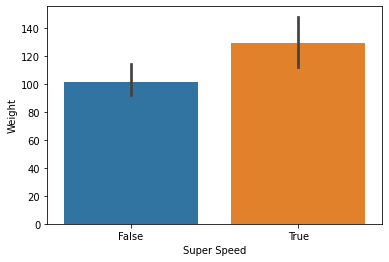

In [26]:
sns.barplot(data = df, x = 'Super Speed', y = 'Weight');

In [27]:
#What is the average height of heroes for each publisher?
df.groupby(['Publisher'])['Height'].mean()

Publisher
DC Comics            181.923913
Dark Horse Comics    176.909091
George Lucas         159.600000
Image Comics         211.000000
Marvel Comics        191.546128
Shueisha             171.500000
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Name: Height, dtype: float64

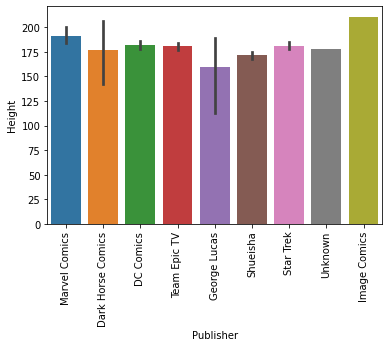

In [28]:
ax = sns.barplot(data=df, x='Publisher',y='Height')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);